In [1]:
import sys
print(sys.version)

3.10.9 (main, Dec 15 2022, 10:44:50) [Clang 14.0.0 (clang-1400.0.29.202)]


In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
pathtosyn = '/Users/lalito/synergia2/build/src'
sys.path.insert(1, pathtosyn)
import synergia
from synergia.lattice import Lattice_element
import pandas as pd
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [3]:
def convert_rbends_to_sbends(orig_lattice):
    lattice = synergia.lattice.Lattice("rrnova")
    for elem in orig_lattice.get_elements():
        if elem.get_type_name() == "rbend":
            new_elem = synergia.lattice.Lattice_element("sbend", elem.get_name())
            new_elem.copy_attributes_from(elem)
            ang = elem.get_double_attribute("angle")
            length = elem.get_double_attribute("l")
            arclength = ang*length/(2.0*np.sin(ang/2.0))
            new_elem.set_double_attribute("l", arclength)
            new_elem.set_double_attribute("e1", ang/2.0)
            new_elem.set_double_attribute("e2", ang/2.0)
            lattice.append(new_elem)
        else:
            lattice.append(elem)
    lattice.set_reference_particle(orig_lattice.get_reference_particle())
    return lattice

In [4]:
# Use SYNERGIA to get lattice
# Import lattice file
lattice_file = "RR2020V0922FLAT_fixed"
ring_name = "ring605_fodo"
orig_lattice = synergia.lattice.Mad8_reader().get_lattice(ring_name, lattice_file)

# Convert RBENDS to SBENDS so synergia works
lattice = convert_rbends_to_sbends(orig_lattice)

# Get Courant-Snyder parameters
#synergia.simulation.Lattice_simulator.adjust_tunes(lattice, 0.4307, 0.353, 1e-3)
synergia.simulation.Lattice_simulator.CourantSnyderLatticeFunctions(lattice)
synergia.simulation.Lattice_simulator.set_closed_orbit_tolerance(1e-12)
synergia.simulation.Lattice_simulator.calculate_closed_orbit(lattice)
synergia.simulation.Lattice_simulator.calc_dispersions(lattice)
print(synergia.simulation.Lattice_simulator.calculate_tune_and_cdt(lattice))

[0.4422077860300187, 0.3915448621570893, 3338.085069590058]


In [23]:
bpmdf = pd.DataFrame()


for elm in lattice.get_elements():
    
    if 'monitor' in elm.get_type_name():
        # print('R:'+elm.get_name().upper())
        # print(elm.lf.beta.hor)
        # print(elm.lf.beta.ver)
        bpmname='R:'+elm.get_name().upper()
        df = pd.DataFrame([{'bpm':bpmname,'s':elm.lf.arcLength,
                            'betax':elm.lf.beta.hor,'betay':elm.lf.beta.ver, 
                            'alphax':elm.lf.alpha.hor,'alphay':elm.lf.alpha.ver}])
        
        bpmdf = pd.concat([bpmdf,df],ignore_index=True)
    #break

In [27]:
bpmdf.to_csv('model_bpm_lf.csv')

In [22]:
alldf = pd.DataFrame()


for elm in lattice.get_elements():
    
    #if 'monitor' in elm.get_type_name():
        # print('R:'+elm.get_name().upper())
        # print(elm.lf.beta.hor)
        # print(elm.lf.beta.ver)
        #bpmname='R:'+elm.get_name().upper()
    df = pd.DataFrame([{'s':elm.lf.arcLength,
                        'betax':elm.lf.beta.hor,'betay':elm.lf.beta.ver, 
                        'alphax':elm.lf.alpha.hor,'alphay':elm.lf.alpha.ver}])

    alldf = pd.concat([alldf,df],ignore_index=True)

In [18]:
alldf

,s,betax,betay
0,0.000001,9.062306,46.916668
1,0.024501,9.065564,46.916465
2,0.046731,9.068636,46.916303
3,0.199131,9.092642,46.915759
4,0.199131,9.092642,46.915759
...,...,...,...
12010,3319.219688,9.041405,46.919589
12011,3319.219688,9.041405,46.919589
12012,3319.372088,9.056613,46.917202
12013,3319.394318,9.059261,46.916936


In [26]:
alldf.to_csv('model_s_lf.csv')

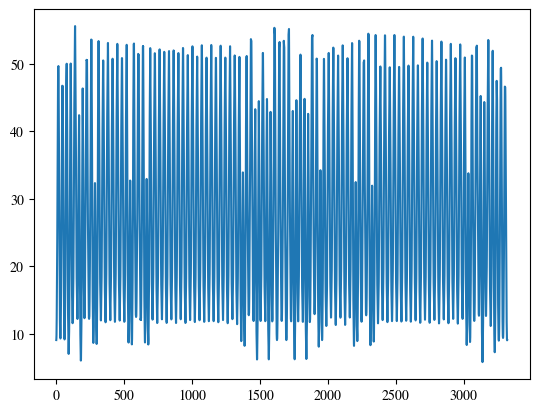

In [19]:
plt.plot(alldf['s'],alldf['betax'])

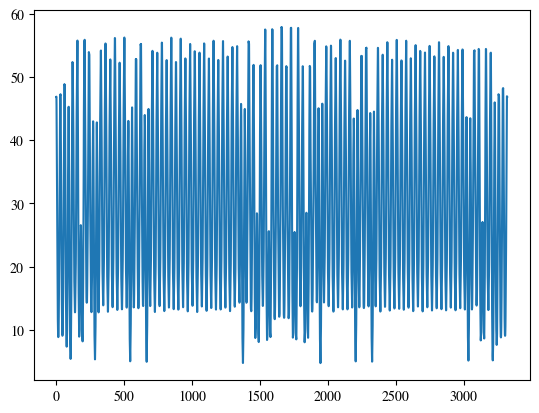

In [20]:
plt.plot(alldf['s'],alldf['betay'])

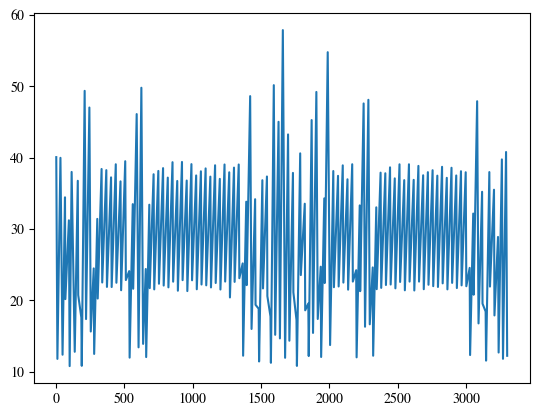

In [21]:
plt.plot(bpmdf['s'],bpmdf['betay'])